# Tutorial: ECT for CW complexes

This tutorial walks you through how to build a CW complex with the `EmbeddedCW` class, and then use the `ECT` class to compute the Euler characteristic transform

In [31]:
from ect import ECT, EmbeddedCW, create_example_cw
import numpy as np

The CW complex is the same as the `EmbeddedGraph` class with that additional ability to add faces. Faces are added by passing in a list of vertices. Note that we are generally assuming that these vertices follow around an empty region (as in, no other vertex is in the interior) in the graph bounded by the vertices, and further that all edges are already included in the graph. However the class does not yet check for this so you need to be careful!

<Axes: >

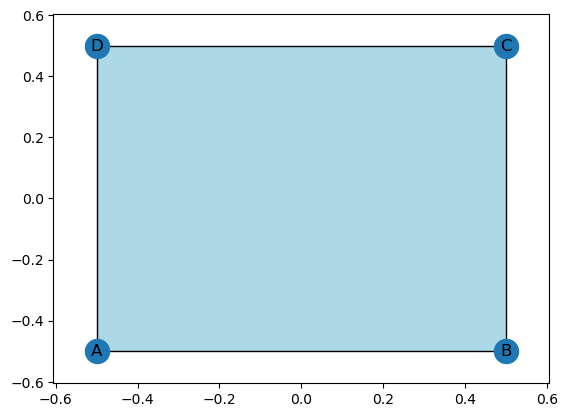

In [26]:
K = EmbeddedCW()

K.add_node('A', 0,0)
K.add_node('B', 1,0)
K.add_node('C', 1,1)
K.add_node('D', 0,1)

K.add_edges_from((('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')))

K.add_face(['A', 'B', 'C', 'D'])

K.set_mean_centered_coordinates()
K.plot()

Just to have something a bit more interesting, let's make a more complicated example that's built into the class.

<Axes: >

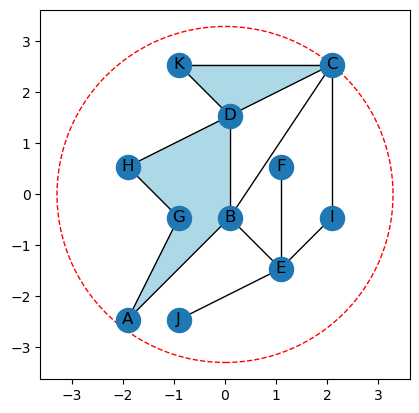

In [32]:
K = create_example_cw(mean_centered = True)
K.plot(bounding_circle=True)

We can also color the nodes based on a function value for a given direction.

<Axes: >

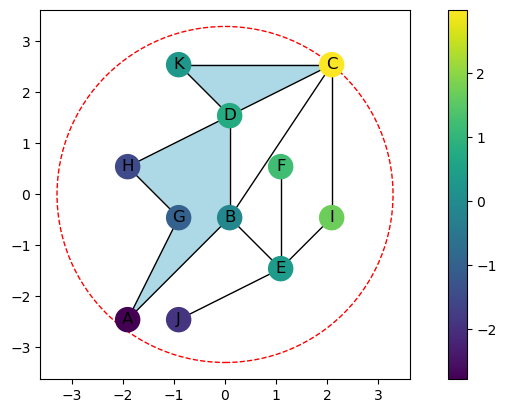

In [36]:
theta = np.pi/7
K.plot(bounding_circle=True,color_nodes_theta=theta)

The function value for any direction can be computed and returned for vertices, edges, or faces. The function value for an edge or face $\sigma$ is given by $g_\omega(\sigma) = \max_{v \in \sigma}\{f(v)\}$. Here we show the function values for the triangle `KDC` and its faces.

In [46]:
vert_g = K.g_omega(theta)
edge_g = K.g_omega_edges(theta)
face_g = K.g_omega_faces(theta)

for v in ['K','D','C']:
    print(f'{v}: {round(vert_g[v],2)}')

for edge in [('D','K'),('C','D'),('C','K')]:
    print(f'{edge}: {round(edge_g[edge],2)}')

for face in [('K','D','C')]:
    print(f'{face}: {round(face_g[face],2)}')

K: 0.29
D: 0.75
C: 2.99
('D', 'K'): 0.75
('C', 'D'): 2.99
('C', 'K'): 2.99
[('B', 'A', 'G', 'H', 'D'), ('K', 'D', 'C')]
('K', 'D', 'C'): 2.99


As with the `EmbeddedGraph` class, we can initialize the `ECT` class by deciding how many directions and how many thresholds to use. 

In [5]:
myect = ECT(num_dirs = 100,num_thresh = 80)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Then we can compute the ECC for a single direction. In this case, the $x$-axis will be computed for the `num_thresh=80` stopping points in the interval $[-1.2r,1.2r]$ where $r$ is the minimum bounding radius for the input complex. 

In [47]:
r = K.get_bounding_radius()
myect.calculateECC(K,0,1.2*r)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

But of course it's easier to see this in a plot. This command calculates the ECC and immediately plots it. 

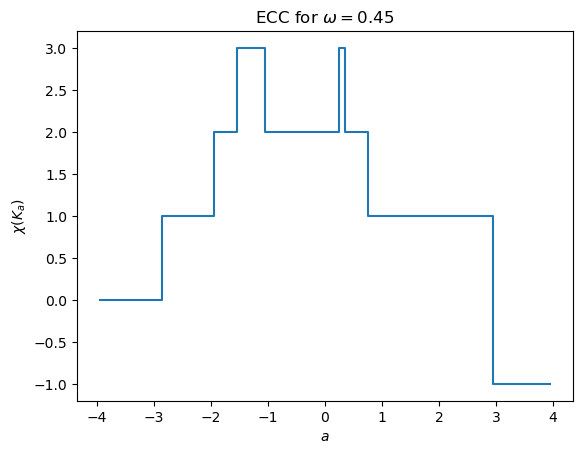

In [48]:
myect.plotECC(K,theta,1.2*r)

Similarly, we can compute the ECT and return the matrix. We make sure to internally set the bounding radius to use to control the $y$ axis of the plot. 

In [58]:
myect.set_bounding_radius(1.2*r)
myect.calculateECT(K)

array([[ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       ...,
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.]])

Once it's been computed, we can use the internal plotting function to take a look.

3.9529463851622046


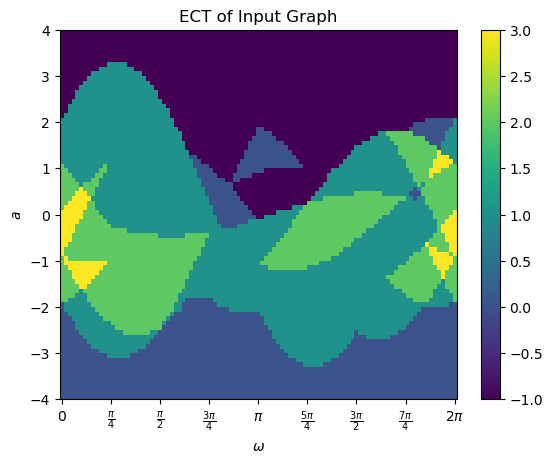

In [59]:
myect.plotECT()
print(myect.bound_radius)

Similarly we can take a look at the SECT. This one was computed when we asked to compute the ECT. 

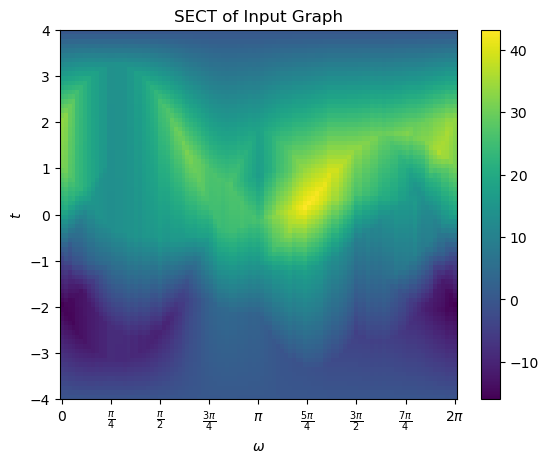

In [60]:
myect.plotSECT()